In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

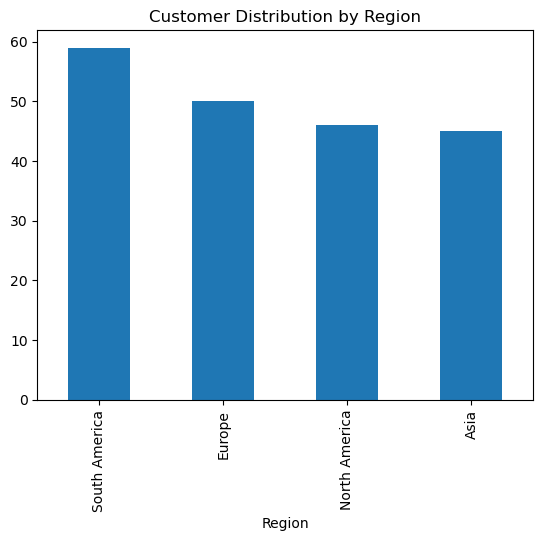

In [3]:
# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Inspect datasets
print(customers.info())
print(products.info())
print(transactions.info())

# Merge datasets
merged = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Example EDA tasks
# 1. Customer distribution by region
region_counts = customers['Region'].value_counts()
region_counts.plot(kind='bar', title='Customer Distribution by Region')
plt.show()



Top-selling products:
 ProductID
P059    46
P054    46
P029    45
P079    43
P061    43
P057    43
P048    43
P062    39
P020    38
P028    38
Name: Quantity, dtype: int64
Revenue by Region:
 Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


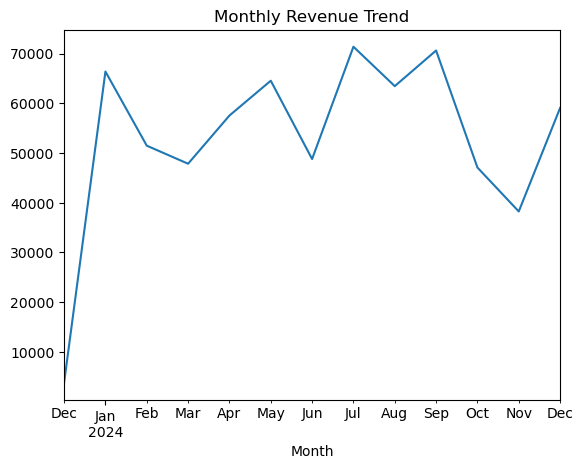

In [4]:
# 2. Top-selling products
top_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top-selling products:\n", top_products)

# 3. Revenue by region
revenue_by_region = merged.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("Revenue by Region:\n", revenue_by_region)

# 4. Monthly revenue trend
merged['TransactionDate'] = pd.to_datetime(merged['TransactionDate'])
merged['Month'] = merged['TransactionDate'].dt.to_period('M')
monthly_revenue = merged.groupby('Month')['TotalValue'].sum()
monthly_revenue.plot(title='Monthly Revenue Trend')
plt.show()